# Solving Linear Programming Models
## Mehmet Gönen
## November 2, 2022

In [1]:
# load libraries
import numpy as np
import scipy.sparse as sp

import cplex as cp

In [2]:
def linear_programming(direction, A, senses, b, c, l, u):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(),
                                                 col_indices.tolist(),
                                                 A.data.tolist()))

    # solve the problem
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

## The shortest-path problem
The essence of the problem can be stated as follows: Given a network with distance $c_{ij}$ (or travel time, or cost, etc.) associated with each arc, find a path through the network from a particular origin (source) to a particular destination (sink) that has the shortest total distance. The simplicity of the statement of the problem is somewhat misleading, because a number of important applications can be formulated as shortest- (or longest-) path problems where this formulation is not obvious at the outset. These include problems of equipment replacement, capital investment, project scheduling, and inventory planning.

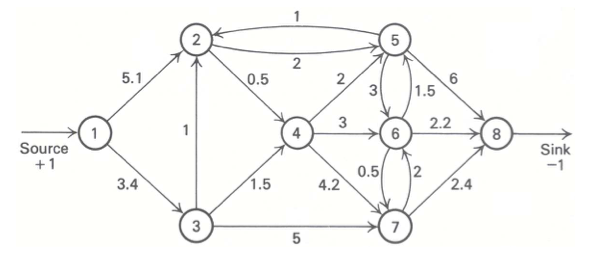

In general, the formulation of the shortest-path problem is as follows:

\begin{align*}
\mbox{minimize} \;\;& \sum\limits_{i} \sum\limits_{j} c_{ij} x_{ij} \\
\mbox{subject to:} \;\;& \sum\limits_{j} x_{ij} - \sum\limits_{k} x_{ki} = 
\begin{cases} 1 & \textrm{if $i = s$ (source)}\\
-1 & \textrm{if $i = t$ (target)}\\
0 & \textrm{otherwise}\end{cases} \\
\;\;& x_{ij} \geq 0 \;\;\;\; \textrm{for all arcs $i-j$ in the network.}
\end{align*}

We can interpret the shortest-path problem as a network-flow problem very easily. We simply want to send one unit of flow from the source to the sink at minimum cost. At the source, there is a net supply of one unit; at the sink, there is a net demand of one unit; and at all other nodes there is no net inflow or outflow.

[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  1.  1.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  0.  1.  1.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0. -1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  0. -1.]]


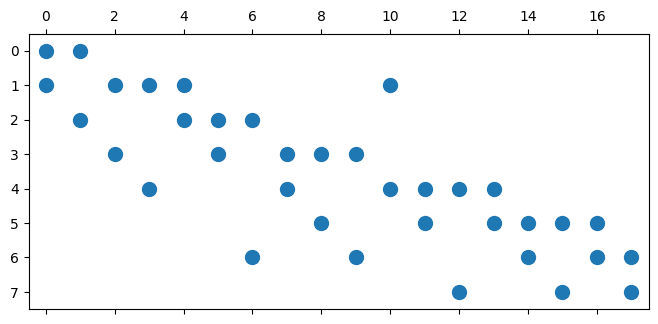

In [3]:
names = np.array(["x_1_2", "x_1_3", "x_2_4", "x_2_5", "x_3_2", "x_3_4", "x_3_7", "x_4_5", "x_4_6",
                  "x_4_7", "x_5_2", "x_5_6", "x_5_8", "x_6_5", "x_6_7", "x_6_8", "x_7_6", "x_7_8"])
c = np.array([5.1, 3.4, 0.5, 2.0, 1.0, 1.5, 5.0, 2.0, 3.0, 4.2, 1.0, 3.0, 6.0, 1.5, 0.5, 2.2, 2.0, 2.4])
senses = np.repeat("E", 8)
b = np.array([1, 0, 0, 0, 0, 0, 0, -1])
l = np.repeat(0, 18)
u = np.repeat(cp.infinity, 18)

A = np.zeros((8, 18))
# node 1
A[0, 0] = 1
A[0, 1] = 1
# node 2
A[1, 0] = -1
A[1, 2] = 1
A[1, 3] = 1
A[1, 4] = -1
A[1, 10] = -1
# node 3
A[2, 1] = -1
A[2, 4] = 1
A[2, 5] = 1
A[2, 6] = 1
# node 4
A[3, 2] = -1
A[3, 5] = -1
A[3, 7] = 1
A[3, 8] = 1
A[3, 9] = 1
# node 5
A[4, 3] = -1
A[4, 7] = -1
A[4, 10] = 1
A[4, 11] = 1
A[4, 12] = 1
A[4, 13] = -1
# node 6
A[5, 8] = -1
A[5, 11] = -1
A[5, 13] = 1
A[5, 14] = 1
A[5, 15] = 1
A[5, 16] = -1
# node 7
A[6, 6] = -1
A[6, 9] = -1
A[6, 14] = -1
A[6, 16] = 1
A[6, 17] = 1
# node 8
A[7, 12] = -1
A[7, 15] = -1
A[7, 17] = -1

print(A)
A = sp.csr_matrix(A)

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 18))
plt.spy(A, marker = "o")
plt.show()

In [4]:
x_star, obj_star = linear_programming("minimize", A, senses, b, c, l, u)
print(names)
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 1 columns.
Aggregator did 1 substitutions.
Reduced LP has 6 rows, 16 columns, and 27 nonzeros.
Presolve time = 0.00 sec. (0.02 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             6.600000
1
optimal
['x_1_2' 'x_1_3' 'x_2_4' 'x_2_5' 'x_3_2' 'x_3_4' 'x_3_7' 'x_4_5' 'x_4_6'
 'x_4_7' 'x_5_2' 'x_5_6' 'x_5_8' 'x_6_5' 'x_6_7' 'x_6_8' 'x_7_6' 'x_7_8']
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
10.100000000000001


In [5]:
def shortest_path_problem(filename):
    # read problem instance from file
    problem = np.loadtxt(filename, dtype = float)

    # add an edge between target and source
    V = np.max(problem[:,range(2)].astype(int))
    E = problem.shape[0]

    c = problem[:,2]
    senses = np.repeat("E", V)
    b = np.concatenate(([+1], np.repeat(0, V - 2), [-1]))
    l = np.repeat(0, E)
    u = np.repeat(cp.infinity, E)

    aij = np.repeat([+1.0, -1.0], repeats = E)
    row = np.concatenate((problem[:,0].astype(int) - 1, problem[:,1].astype(int) - 1))
    col = np.concatenate((range(E), range(E)))
    A = sp.csr_matrix((aij, (row, col)), shape = (V, E))

    x_star, obj_star = linear_programming("minimize", A, senses, b, c, l, u)
    return(x_star, obj_star)

In [6]:
x_star, obj_star = shortest_path_problem("shortest_path_problem1.txt")
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 1 columns.
Aggregator did 1 substitutions.
Reduced LP has 6 rows, 16 columns, and 27 nonzeros.
Presolve time = 0.00 sec. (0.02 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             6.600000
1
optimal
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
10.100000000000001
